In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import xlrd
import numpy as np
import seaborn as sns
import joblib

In [2]:
preds = [6399038000, 8240000000,11310237000,12208281000,11361323000,10803387000,12348385000,13074100000, 12857667000,17743400000,21145200000]
true = [8613483384.46, 11334538970.16,10813732699.53, 8101885886.87,8916328469.16, 9962889434.44, 11518070774.48,11700807336.31,16900358608,17336881098.56,15165765187.88]
years = range(2010,2021)

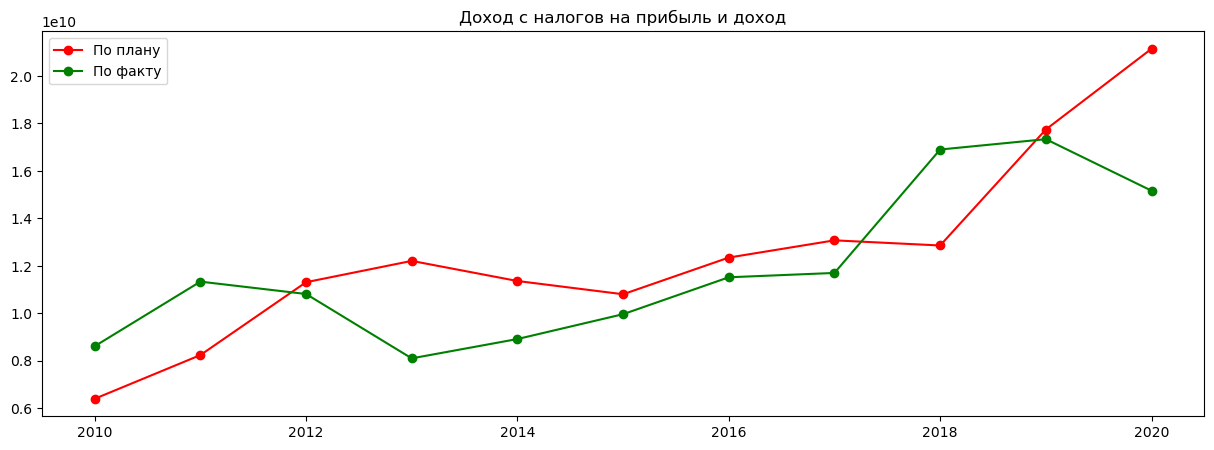

In [3]:
fig, axes = plt.subplots(figsize=(15,5))
axes.plot(years,preds,'r-o',label='По плану')
axes.plot(years,true,'g-o',label='По факту')
axes.legend()
axes.set_title('Доход с налогов на прибыль и доход')
plt.show()

In [4]:
abs(np.array(preds)-np.array(true)).mean()/10**10

0.23481480068536362

In [5]:
path = 'data/predictions_budget/'
def remove_star(x):
    try:
        x= x.replace('*','')
    except:
        pass
    try:
        x= x.replace(' ','')
    except:
        pass
    try:
        x= x.replace(',','.')
    except:
        pass
    return x
def before_twety_eighteen(name,ax):
    try:
        df = pd.read_excel(path+name, header=[2,3]).dropna(how='any')
    except:
        df = pd.read_excel(path+name, header=[4,5]).dropna(how='any')
    main_year = (name[:4])
    df=df.drop(labels=[(            'Единицы',          'измерения'),
                       (f'{main_year} год    прогноз',          'вариант 1'),
                       ( f'{str(int(main_year)+1)} год   прогноз',          'вариант 1'),
                       (f'{str(int(main_year)+2)} год   прогноз',          'вариант 1')],
               axis='columns')
    df=df.T
    df = df.rename(columns=df.iloc[0])
    df=df.drop((         'Показатели', 'Unnamed: 0_level_1'),axis='index').applymap(remove_star)
    return sns.heatmap(abs(df.astype('float64').corr()),ax=ax,xticklabels=False, yticklabels=False)

In [6]:
def twenty_eighteen(name,ax):
    path = 'data/predictions_budget/'
    try:
        df = pd.read_excel(path+name, header=[2,3]).dropna(how='any') 
    except:
        df = pd.read_excel(path+name, header=[1,3]).dropna(how='any') 
    main_year = (name[:4])
    df = df.drop(labels=[
    (f'прогноза социально-экономического развития Республики Карелия на {main_year} год и плановый период {str(int(main_year)+1)} и {str(int(main_year)+2)} годов','Единицы измерения'),
    (f'прогноза социально-экономического развития Республики Карелия на {main_year} год и плановый период {str(int(main_year)+1)} и {str(int(main_year)+2)} годов',f'{main_year} год прогноз'),
    (f'прогноза социально-экономического развития Республики Карелия на {main_year} год и плановый период {str(int(main_year)+1)} и {str(int(main_year)+2)} годов',f'{main_year} год прогноз.2'),
    (f'прогноза социально-экономического развития Республики Карелия на {main_year} год и плановый период {str(int(main_year)+1)} и {str(int(main_year)+2)} годов',f'{str(int(main_year)+1)} год прогноз'),
    (f'прогноза социально-экономического развития Республики Карелия на {main_year} год и плановый период {str(int(main_year)+1)} и {str(int(main_year)+2)} годов',f'{str(int(main_year)+1)} год прогноз.2'),    
    (f'прогноза социально-экономического развития Республики Карелия на {main_year} год и плановый период {str(int(main_year)+1)} и {str(int(main_year)+2)} годов',f'{str(int(main_year)+2)} год прогноз'),
    (f'прогноза социально-экономического развития Республики Карелия на {main_year} год и плановый период {str(int(main_year)+1)} и {str(int(main_year)+2)} годов',f'{str(int(main_year)+2)} год прогноз.2')
    ],axis='columns')
    df = df.T.applymap(remove_star)
    df = df.rename(columns=df.iloc[0])
    df=df.drop(df.index[0],axis='index')
    return sns.heatmap(abs(df.astype('float64').corr()),ax=ax,xticklabels=False, yticklabels=False)

In [7]:
file0 = '2010-2012.xls'
file1 = '2011-2013.xls'
file2 = '2020-2022.xls'
file3 = '2019-2021.xls'

%matplotlib inline
fig, ax = plt.subplots(2,2,figsize=(18,14))
before_twety_eighteen(file0,ax[0][0])
before_twety_eighteen(file1,ax[0][1])
twenty_eighteen(file3, ax[1][0])
twenty_eighteen(file2,ax[1][1])
plt.show()


ans = []
idx = 0
for y in years:
    df = pd.read_excel(path+str(f'{y}-{y+2}.xls'), header=0).dropna(how='any')
    values = df.iloc[idx].values
    ans.append(remove_star(values[2]))

plt.plot(years,ans,'g-o')
plt.title(df.iloc[idx].values[0])
plt.show()

In [8]:
df = pd.read_excel('ready.xlsx')
df=df.set_axis(df['год']).drop(["год"],axis='columns')

In [9]:
df_for_exp = df.iloc[3:14].drop(['Внешнеторговый оборот             ','Уровень зарегистрированной безработицы ',"Прибыль прибыльных организаций","Реальные денежные доходы населения"],axis='columns')
df_for_exp

,"Численность постоянного населения (среднегодовая), тыс. человек","Индекс потребительских цен (декабрь к декабрю), %","Валовой региональный продукт, млн. руб","Добыча полезных ископаемых, в % к п. году","Обрабатывающие производства, в % к п. году","железорудные окатыши, тыс. тонн","бумага, тыс. тонн","мешки бумажные, млн. штук","Картофель, тыс. тонн","Овощи, тыс. тонн",...,"Яйца, млн. штук","Реализация алкогольной продукции организациями-производителями, тыс. дкл","Инвестиции в основной капитал за счет всех источников финансирования, млн руб","Ввод в эксплуатацию жилых домов за счет всех источников финансирования, тыс. кв. м общей площади","Оборот розничной торговли, млн. рублей","Объем платных услуг населению, млн. рублей","Фонд заработной платы, млн. рублей","Фонд заработной платы с учетом необлагаемой его части, млн. рублей","Налогооблагаемая прибыль, млн. рублей","Среднегодовая остаточная стоимость облагаемого имущества, млн. рублей"
год,,,,,,,,,,,,,,,,,,,,,
2010.0,646.10,109.90,130.0000,107.939685,115.994073,9790.1,1023.10,337.5000,76.5,21.60,...,59.0,1048.060,22266.1,142.60,60033.4,17128.8,54935.5,64841.0,22108.600000,88077.000
2011.0,641.13,105.30,139.2000,116.143101,108.918434,10120.0,995.60,351.7000,89.5,22.10,...,21.1,507.300,29698.1,177.80,69919.6,20254.7,60180.0,70677.0,34792.000000,91040.000
2012.0,638.30,106.10,145.0000,119.627394,100.422797,10325.0,922.90,368.7000,74.1,17.40,...,10.2,1132.700,32097.4,195.30,78438.8,22655.6,67080.0,78200.0,29374.000000,97828.500
2013.0,635.70,106.50,167.5000,121.541432,83.551767,10560.0,711.00,382.7000,94.3,21.50,...,8.4,486.300,29979.8,218.60,86819.8,25093.7,72633.2,85100.0,12222.300000,145305.189
2014.0,633.50,110.90,189.2000,121.662974,83.301111,10589.9,863.10,421.8000,89.9,19.00,...,5.7,834.130,33399.5,240.95,97333.1,27318.4,74523.9,91500.0,10210.000000,142786.600
2015.0,631.20,112.30,194.5000,120.689670,82.634703,10624.0,899.05,423.9994,88.1,17.40,...,5.7,348.500,32373.1,270.30,103880.9,28843.0,75642.5,90000.0,17300.000000,138605.300
2016.0,628.50,104.30,233.4498,124.310360,85.444282,10877.0,945.30,491.5000,71.1,16.80,...,5.6,360.500,34700.0,293.20,107326.0,30795.6,76762.8,95500.0,23778.011665,135107.406
2017.0,624.80,102.79,255.0000,128.163981,85.529727,11170.0,931.40,427.0000,67.2,17.50,...,5.6,100.236,41707.3,222.30,112645.0,33410.2,80426.1,98500.0,23660.000000,141734.962
2018.0,620.30,104.30,270.0000,129.189293,92.029986,11200.0,1030.00,491.9000,35.3,11.30,...,7.9,114.514,41237.0,271.00,121317.8,34583.4,90725.0,112900.0,47800.000000,156000.000


In [10]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import TimeSeriesSplit
import numpy as np
regs = [LR(),ElasticNet(),Ridge(), Lasso()]
params = [
    {
        "normalize":["True"],
     #"positive":["True","False"]
    },
    {
        "normalize":["True"],
     #"positive":["True","False"],
        "l1_ratio":np.linspace(0,1,10),
        "alpha":[0.1,0.3,0.01,0.5,1,2],
        'selection':['cyclic', 'random']
    },
    {
        "normalize":["True"],
        "alpha":[0.1,0.3,0.01,0.5,1,2]
    },
    {
        "normalize":["True"],
     #"positive":["True","False"],
        "alpha":[0.1,0.3,0.01,0.5,1,2,0.05],
        'selection':['cyclic', 'random']
    }
]

test_count = 2

X_train = df_for_exp.iloc[:-test_count]
X_test = df_for_exp.iloc[-test_count:]
y_train = true[:-test_count]
y_test = true[-test_count:]

In [11]:
best_model = []
for model in enumerate(regs):
    search = GridSearchCV(model[1],
                          scoring='neg_mean_absolute_error',cv=LeaveOneOut(),
                          param_grid=params[model[0]],n_jobs=-1, verbose=1).fit(X_train, y_train)
    best_model.append(search.best_estimator_)

Fitting 9 folds for each of 1 candidates, totalling 9 fits
Fitting 9 folds for each of 120 candidates, totalling 1080 fits
Fitting 9 folds for each of 6 candidates, totalling 54 fits
Fitting 9 folds for each of 14 candidates, totalling 126 fits


In [12]:
for reg in best_model:
    print(reg)
    for i in range(test_count):
        res = reg.predict(X_test)[i]
        inpt = preds[-test_count+i]
        true_res = true[-test_count+i]
        print("год", 2021-test_count+i )
        print(f'Разница нашего предсказанного дохода и действительного {res-true_res} или {round(res/true_res*100)-100}%')
        print(f'Разница  предсказанного дохода и действительного {inpt-true_res} или {round(inpt/true_res*100)-100}%')
        print(f'Наша разница меньше на {round(inpt/true_res*100)-round(res/true_res*100)}% ')
    print()

LinearRegression(normalize='True')
год 2019
Разница нашего предсказанного дохода и действительного 722597056.3316879 или 4%
Разница  предсказанного дохода и действительного 406518901.4399986 или 2%
Наша разница меньше на -2% 
год 2020
Разница нашего предсказанного дохода и действительного 3790142800.207651 или 25%
Разница  предсказанного дохода и действительного 5979434812.120001 или 39%
Наша разница меньше на 14% 

ElasticNet(alpha=0.01, l1_ratio=1.0, normalize='True')
год 2019
Разница нашего предсказанного дохода и действительного 1215534826.6064415 или 7%
Разница  предсказанного дохода и действительного 406518901.4399986 или 2%
Наша разница меньше на -5% 
год 2020
Разница нашего предсказанного дохода и действительного 4646827086.613684 или 31%
Разница  предсказанного дохода и действительного 5979434812.120001 или 39%
Наша разница меньше на 8% 

Ridge(alpha=0.3, normalize='True')
год 2019
Разница нашего предсказанного дохода и действительного 330055949.4041214 или 2%
Разница  предска

In [13]:
ys = list(range(2020-test_count+1,2021))
ys

[2019, 2020]

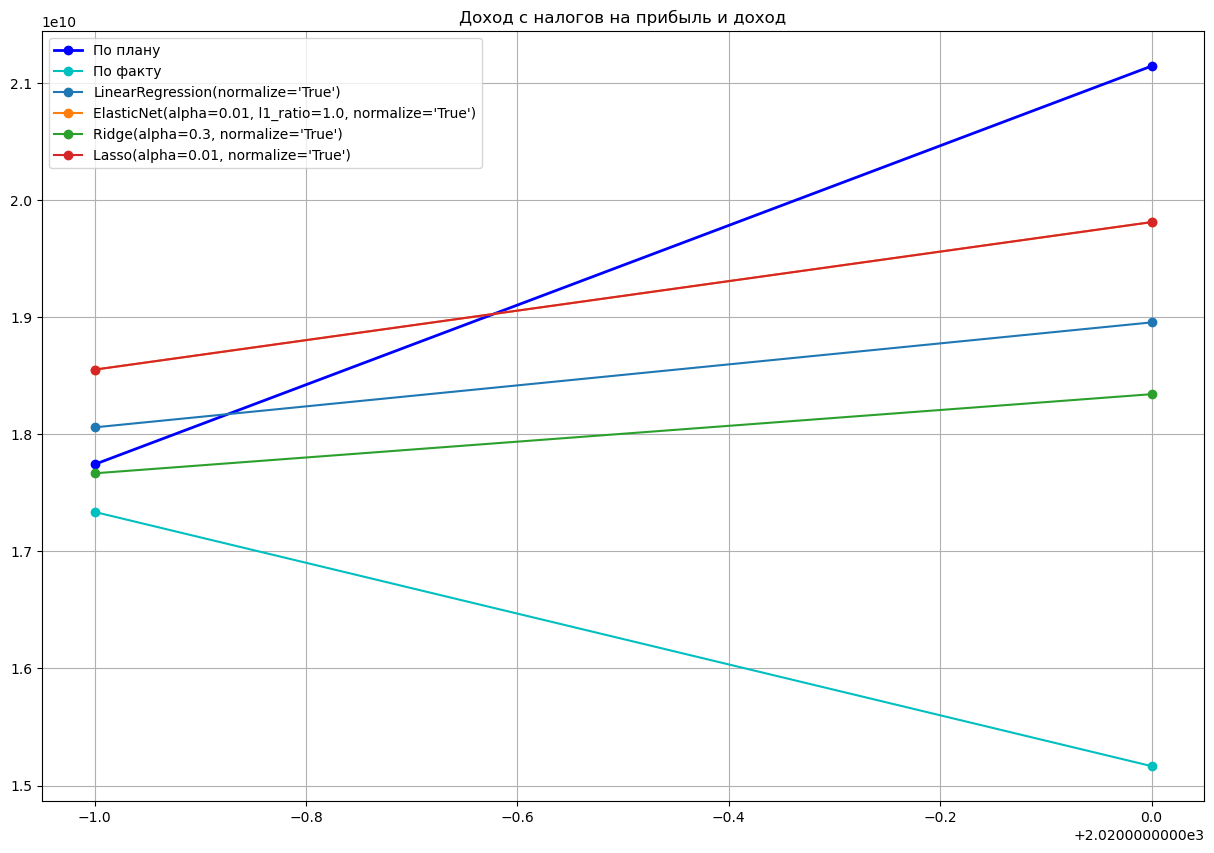

In [16]:
fig, axes = plt.subplots(figsize=(15,10))
axes.plot(ys, preds[-test_count:],'b-o',label='По плану',linewidth=2)
axes.plot(ys, y_test,'c-o',label='По факту')
for i in range(len(best_model)):
    axes.plot(ys, best_model[i].predict(X_test),'o-',label=best_model[i])
axes.legend()
axes.grid(True)
axes.set_title('Доход с налогов на прибыль и доход')
plt.show()

In [18]:
joblib.dump(best_model[-2],'income_model.pkl')

['income_model.pkl']

In [19]:
def template2df(file):
    test_df = pd.read_excel(file)
    test_df = test_df.drop(['Единица измерения'],axis='columns').T.reset_index(drop=True)
    test_df = test_df.rename(columns=test_df.iloc[0]).drop(test_df.index[0],axis='index')
    years = test_df['Год'].astype(int)
    test_df = test_df.drop(['Год'],axis='columns')
    return years.values, test_df


In [ ]:
years, df = template2df('test.xlsx')

In [ ]:
weights = pd.DataFrame(columns=list(df.columns),index=[0])
weights.iloc[0]=best_model[-2].coef_
weights

In [21]:
t_at_all = [24873441175.45, 27556466680.93, 29140749888.23,28754420604.42, 27750206180.02, 
            28390875283.93,32546447594.29, 34385355496.24,47268601337.1,51272761265.22,60597379486.3]
p_at_all = [18728828200, 21366051700, 24491384360, 25171632200,25532336100,26184879800,
            36494984781.04,39469802278.5,38321305400,49506015400,60341669397.2]

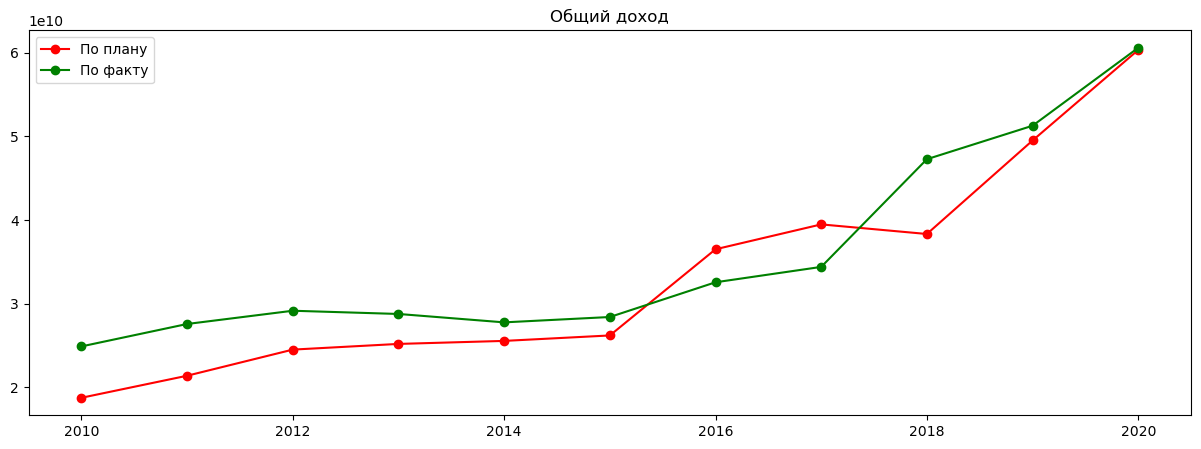

In [22]:
fig, axes = plt.subplots(figsize=(15,5))
axes.plot(years,p_at_all,'r-o',label='По плану')
axes.plot(years,t_at_all,'g-o',label='По факту')
axes.legend()
axes.set_title('Общий доход')
plt.show()

In [23]:
y_train_at_all = t_at_all[:-test_count]
y_test_at_all = t_at_all[-test_count:]
best_model_aa = []
for model in enumerate(regs):
    search = GridSearchCV(model[1],
                          scoring='neg_mean_absolute_error',cv=LeaveOneOut(),
                          param_grid=params[model[0]],n_jobs=-1, verbose=1).fit(X_train, y_train_at_all)
    best_model_aa.append(search.best_estimator_)

Fitting 9 folds for each of 1 candidates, totalling 9 fits
Fitting 9 folds for each of 120 candidates, totalling 1080 fits
Fitting 9 folds for each of 6 candidates, totalling 54 fits
Fitting 9 folds for each of 14 candidates, totalling 126 fits


/Users/denis/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.353775643989834e+19, tolerance: 3.5347169162897628e+16
  model = cd_fast.enet_coordinate_descent(


In [24]:
for reg in best_model_aa:
    print(reg)
    for i in range(test_count):
        res = reg.predict(X_test)[i]
        inpt = p_at_all[-test_count+i]
        true_res = t_at_all[-test_count+i]
        print("год", 2021-test_count+i )
        print(f'Разница нашего предсказанного дохода и действительного {res-true_res} или {round(res/true_res*100)-100}%')
        print(f'Разница  предсказанного дохода и действительного {inpt-true_res} или {round(inpt/true_res*100)-100}%')
        print(f'Наша разница меньше на {round(inpt/true_res*100)-round(res/true_res*100)}% ')
    print()

LinearRegression(normalize='True')
год 2019
Разница нашего предсказанного дохода и действительного -4326609759.023529 или -8%
Разница  предсказанного дохода и действительного -1766745865.2200012 или -3%
Наша разница меньше на 5% 
год 2020
Разница нашего предсказанного дохода и действительного -12110699149.456314 или -20%
Разница  предсказанного дохода и действительного -255710089.1000061 или 0%
Наша разница меньше на 20% 

ElasticNet(alpha=0.5, l1_ratio=0.0, normalize='True', selection='random')
год 2019
Разница нашего предсказанного дохода и действительного -10214067443.737617 или -20%
Разница  предсказанного дохода и действительного -1766745865.2200012 или -3%
Наша разница меньше на 17% 
год 2020
Разница нашего предсказанного дохода и действительного -18481929653.714935 или -30%
Разница  предсказанного дохода и действительного -255710089.1000061 или 0%
Наша разница меньше на 30% 

Ridge(alpha=2, normalize='True')
год 2019
Разница нашего предсказанного дохода и действительного -780418

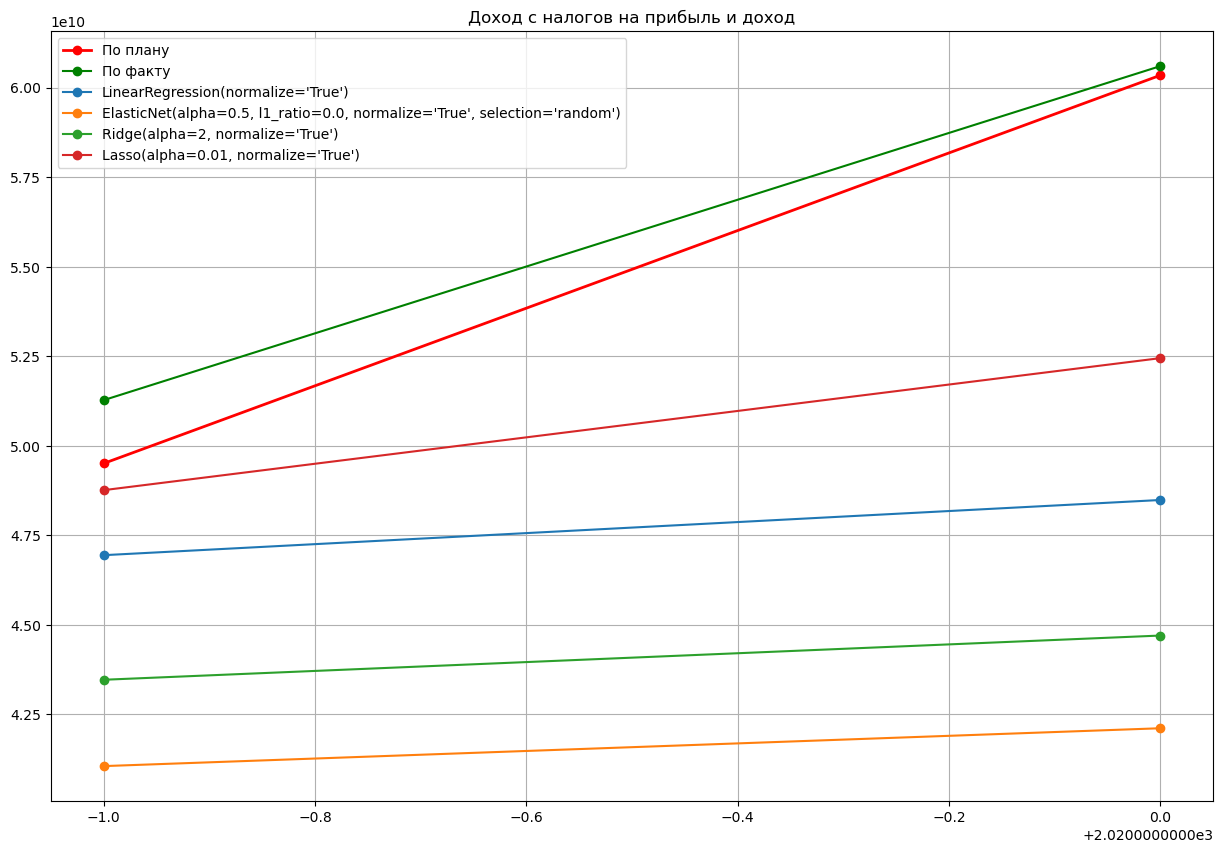

In [25]:
fig, axes = plt.subplots(figsize=(15,10))
axes.plot(range(2020-test_count+1,2021), p_at_all[-test_count:],'r-o',label='По плану',linewidth=2)
axes.plot(range(2020-test_count+1,2021), y_test_at_all,'g-o',label='По факту')
for i in range(len(best_model_aa)):
    axes.plot(range(2020-test_count+1,2021), best_model_aa[i].predict(X_test),'o-',label=best_model_aa[i])
axes.legend()
axes.grid(True)
axes.set_title('Доход с налогов на прибыль и доход')
plt.show()

In [26]:
t_n_and_nn = [15322132232.73, 18202689345.18, 17570424288.03,15173763025.93,15956764902,17808163620.08,
              19654412574.42, 20129196349.22, 26604349315.43, 27763981934.92,27131141282.57] 
p_n_and_nn = [13231012000.00, 15240527000, 17322409000, 19883469000,18466755000,
             18722703000,27372190971.69,28234753941.5,21533939000,27185753100,33317772000]

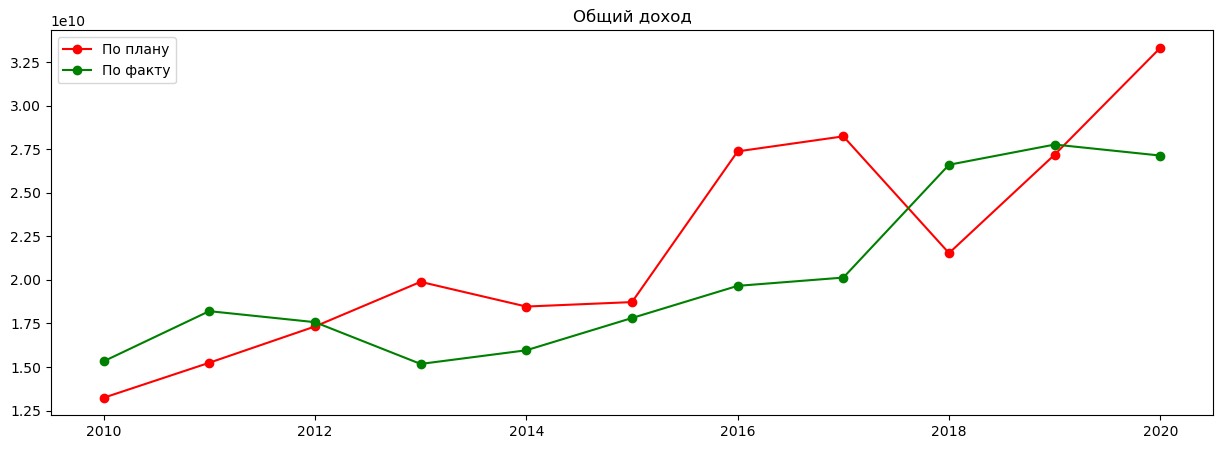

In [27]:
fig, axes = plt.subplots(figsize=(15,5))
axes.plot(years,p_n_and_nn,'r-o',label='По плану')
axes.plot(years,t_n_and_nn,'g-o',label='По факту')
axes.legend()
axes.set_title('Общий доход')
plt.show()

In [28]:
y_train_nan = t_n_and_nn[:-test_count]
y_test_nan = t_n_and_nn[-test_count:]
best_model_aa = []
for model in enumerate(regs):
    search = GridSearchCV(model[1],
                          scoring='neg_mean_squared_error',cv=LeaveOneOut(),
                          param_grid=params[model[0]],n_jobs=-1, verbose=1).fit(X_train, y_train_nan)
    best_model_aa.append(search.best_estimator_)

Fitting 9 folds for each of 1 candidates, totalling 9 fits
Fitting 9 folds for each of 120 candidates, totalling 1080 fits
Fitting 9 folds for each of 6 candidates, totalling 54 fits
Fitting 9 folds for each of 14 candidates, totalling 126 fits


In [29]:
for reg in best_model_aa:
    print(reg)
    for i in range(test_count):
        res = reg.predict(X_test)[i]
        inpt = p_n_and_nn[-test_count+i]
        true_res = t_n_and_nn[-test_count+i]
        print("год", 2021-test_count+i )
        print(f'Разница нашего предсказанного дохода и действительного {res-true_res} или {round(res/true_res*100)-100}%')
        print(f'Разница  предсказанного дохода и действительного {inpt-true_res} или {round(inpt/true_res*100)-100}%')
        print(f'Наша разница меньше на {round(inpt/true_res*100)-round(res/true_res*100)}% ')
    print()

LinearRegression(normalize='True')
год 2019
Разница нашего предсказанного дохода и действительного 223129197.89253998 или 1%
Разница  предсказанного дохода и действительного -578228834.9199982 или -2%
Наша разница меньше на -3% 
год 2020
Разница нашего предсказанного дохода и действительного 1834213478.4007568 или 7%
Разница  предсказанного дохода и действительного 6186630717.43 или 23%
Наша разница меньше на 16% 

ElasticNet(alpha=0.01, l1_ratio=1.0, normalize='True')
год 2019
Разница нашего предсказанного дохода и действительного 915956821.640091 или 3%
Разница  предсказанного дохода и действительного -578228834.9199982 или -2%
Наша разница меньше на -5% 
год 2020
Разница нашего предсказанного дохода и действительного 3145421717.022316 или 12%
Разница  предсказанного дохода и действительного 6186630717.43 или 23%
Наша разница меньше на 11% 

Ridge(alpha=1, normalize='True')
год 2019
Разница нашего предсказанного дохода и действительного -1421739679.0841255 или -5%
Разница  предсказан

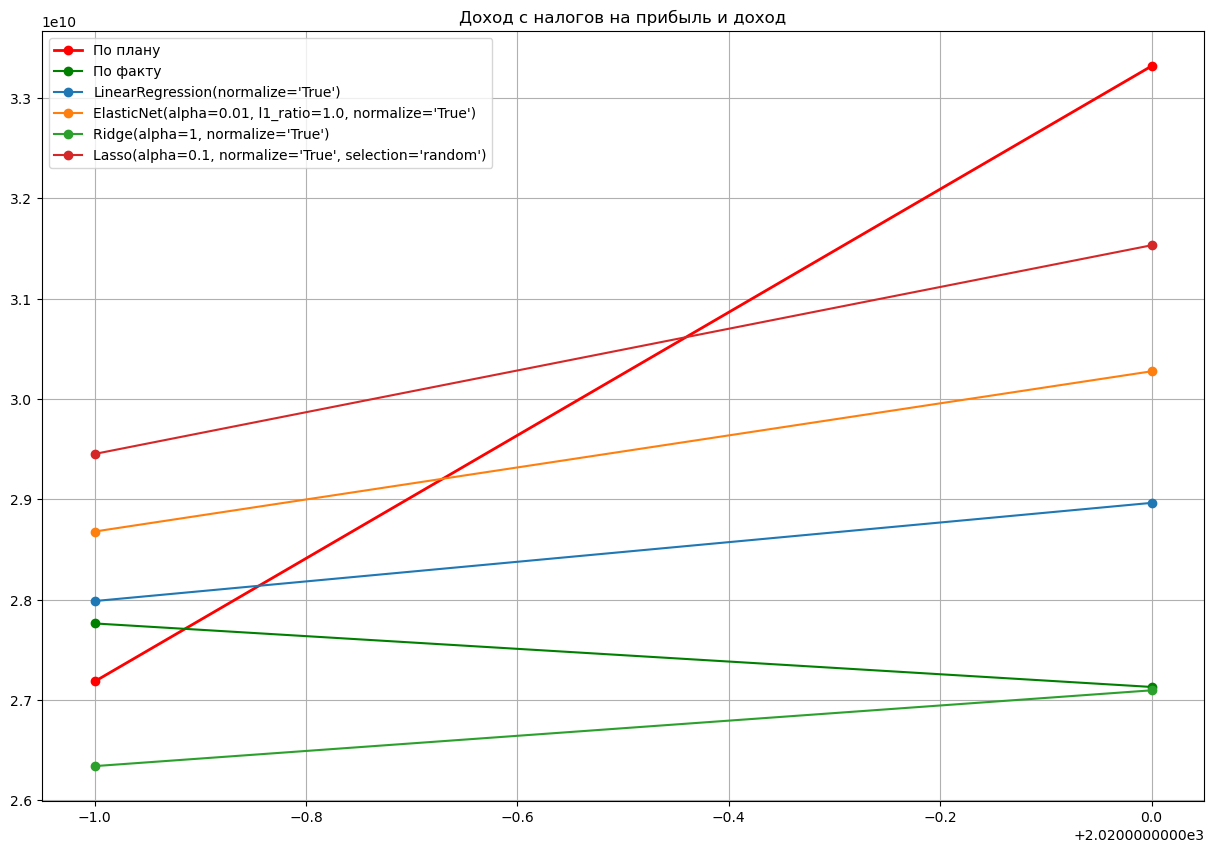

In [30]:
fig, axes = plt.subplots(figsize=(15,10))
axes.plot(range(2020-test_count+1, 2021), p_n_and_nn[-test_count:],'r-o',label='По плану',linewidth=2)
axes.plot(range(2020-test_count+1, 2021), y_test_nan,'g-o',label='По факту')
for i in range(len(best_model_aa)):
    axes.plot(range(2020-test_count+1,2021), best_model_aa[i].predict(X_test),'o-',label=best_model_aa[i])
axes.legend()
axes.grid(True)
axes.set_title('Доход с налогов на прибыль и доход')
plt.show()

In [31]:
ys=list(range(2020-test_count+1, 2021))
plt.plot([2019,2020],[1,2])
plt.xlim([2019,2020])


(2019.0, 2020.0)

In [33]:
joblib.dump(best_model_aa[-2],'tant_model.pkl')

['tant_model.pkl']